In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html 이 페이지를 적극 참조하도록 하자.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

- 다음의 데이터를 이용해서 시계열 예측을 진행하자.
- 이 데이터는 Tensorflow 홈페이지에서 제공하는 데이터셋

In [3]:
df = pd.read_csv('./Datasets/timedata.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
# 데이터 형식을 맞추어 주어야 한다.
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [5]:
date_time

0        2009-01-01 00:10:00
1        2009-01-01 00:20:00
2        2009-01-01 00:30:00
3        2009-01-01 00:40:00
4        2009-01-01 00:50:00
                 ...        
420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: Date Time, Length: 420551, dtype: datetime64[ns]

In [6]:
df = df.set_index(date_time)

In [7]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [8]:
train_df = df[:40000] 
test_df = df[40000:41000]

# Autoregression (AR)

- https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html

- Autoregression 에서 Auto 란 자기 자신을 의미한다. 즉 Auto regression 이란 '자기 회귀' 를 의미한다. 
- $ y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}, $
    - 위에서 $\varepsilon_{t}$ 는 백색잡음을 나타낸다. 
    - $y_{t}$ 는 t 시점에서의 관측치를 나타낸다.
- 즉 이전 시점의 관측값들을 회귀로서 이용하는것이다.
- 하지만 이때 '회귀' 를 이용하기 때문에 계절성에 취약하고, 이전 관측값만을 모델에서 이용하기때문에 예측값의 변동을 정확하게 잡아내지 못한다는 단점이 있다.
- 단변량이기 때문에 오는 어쩔 수 없는 부정확함이 있다.

- statmodel 에서는 아래와 같은 식으로 나온다

![image](./Pictures/Auto_Regression.PNG)

- statmodel 의 시계열 생성 순서는
1. 모델 정의
2. fitting 
3. predict 로 구성된다

In [9]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random

In [26]:
# 모델 생성. 우선 외생변수가 없고, lags(모델의 차수) 를 10으로 주자.
model = AutoReg(train_df['rh (%)'],lags=10)

In [27]:
# fitting 작업. 
model_fit = model.fit()

In [28]:
# 11~12 번째 인덱스
train_df.iloc[11:13,:]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 02:10:00,996.63,-8.85,264.57,-9.70,93.5,3.12,2.92,0.20,1.82,2.93,1312.11,0.16,0.50,158.3


In [29]:
# 아래와 같이 진행하면, predict 하는 기준은 index 가 된다.
# 아래 predict 구간은 11번째 index ~ 12 번째 인덱스(포함)
model_fit.predict(start = 11,end = 12)

2009-01-01 02:00:00    93.036358
2009-01-01 02:10:00    93.049346
Freq: 10T, dtype: float64

## ARX

-  이 모델은 외생변수가 있는 AR 모델로 아래와 같이 작동한다.

In [30]:
# fit model
model = AutoReg(train_df['rh (%)'],
                lags=10, # lag 는 얼마나 많은 차수를 넣을지 결정하는것이다.
                exog=train_df.drop(columns =['rh (%)']) # 외생변수를 고려한다. AR 에서의 모델 설명과 같이 선형으로 들어가며 이를 넣으면 다변량 시계열이 된다.
               ) 
model_fit = model.fit()

<AxesSubplot:xlabel='Date Time'>

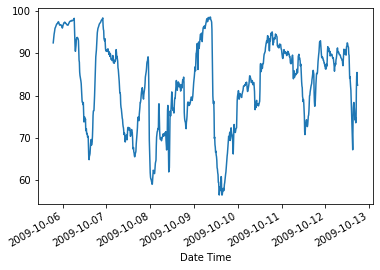

In [31]:
test_df['rh (%)'].plot()

In [32]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-05 18:00:00,988.25,10.61,284.73,9.38,92.1,12.81,11.79,1.01,7.46,11.93,1207.72,1.13,2.25,136.5
2009-10-05 18:10:00,988.25,10.52,284.64,9.21,91.6,12.73,11.66,1.07,7.37,11.80,1208.16,1.70,3.00,134.4
2009-10-05 18:20:00,988.25,10.48,284.60,9.16,91.5,12.70,11.62,1.08,7.34,11.75,1208.35,1.68,3.25,125.8


In [33]:
len(train_df)

40000

In [34]:
test_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-10-05 18:50:00,988.42,10.33,284.44,9.17,92.5,12.57,11.63,0.94,7.35,11.76,1209.20,0.61,1.25,42.71
2009-10-05 19:00:00,988.51,10.07,284.17,9.02,93.2,12.35,11.51,0.84,7.28,11.65,1210.47,0.61,1.13,356.10
2009-10-05 19:10:00,988.51,9.92,284.02,9.00,94.0,12.23,11.49,0.73,7.26,11.63,1211.12,1.02,1.63,1.64
2009-10-05 19:20:00,988.50,9.87,283.97,9.05,94.6,12.19,11.53,0.66,7.29,11.66,1211.31,0.89,1.50,30.70
2009-10-05 19:30:00,988.48,9.70,283.80,8.94,95.0,12.05,11.45,0.60,7.23,11.58,1212.05,1.35,1.88,32.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-12 17:00:00,991.27,6.25,280.11,3.29,81.3,9.52,7.74,1.78,4.87,7.81,1232.25,1.57,3.28,151.90
2009-10-12 17:10:00,991.44,5.83,279.68,3.44,84.6,9.25,7.82,1.42,4.92,7.89,1234.27,1.67,3.46,215.00
2009-10-12 17:20:00,991.66,5.67,279.50,3.44,85.5,9.15,7.82,1.33,4.92,7.89,1235.24,1.86,3.76,264.00


In [35]:
y_pred=(pd.DataFrame(model_fit.predict(len(train_df), # 시작 지점은 train_df 이후의 첫 지점부터
                               len(train_df)+len(test_df)-1, # 마지막 index 는 
                               exog_oos = test_df.drop(columns =['rh (%)']))))

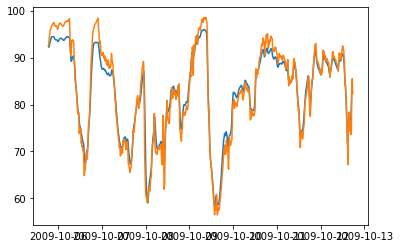

In [38]:
plt.plot(y_pred)
plt.plot(test_df['rh (%)'])

- 어느정도 prediction 이 원래 prediction 의 추이와 비슷하다.

# Moving Average (MA)


- 이동 평균 모델은 과거 예측값의 오차들을 이용한다.
- $ y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q} $
    - 이 떄에 $\varepsilon_{t}$ 는 백색잡음을 나타낸다.
    - $y_{t}$ 는 t 시점에서의 관측치를 나타낸다.
- 즉 이전의 '에러(모델이 예측하지 못한 값들)' 의 가중합들이, 그 다음 예측치의 값 이라는 의미이다.
- 사실 AR,MA 는 별 의미가 없는것이 ARMIMA 에서 모두 포함되기 때문이다. 여기서는 간단히 예측하자.

In [39]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset

In [46]:
model = ARIMA(train_df['rh (%)'], order=(0, 0, 8))
model_fit = model.fit()
# make prediction
y_pred = model_fit.predict(len(train_df), len(train_df)+3)
print(y_pred)

2009-10-05 18:50:00    91.771171
2009-10-05 19:00:00    89.996137
2009-10-05 19:10:00    87.665994
2009-10-05 19:20:00    84.828505
Freq: 10T, Name: predicted_mean, dtype: float64


# ARIMA

- ARIMA 란 차분과 MR, MA 모델을 합한것이다.
- 차분을 하는 이유는, 대부분의 시계열 모델들은 정상성을 가정하고 모델을 만들기 때문이다.
- 그에 따라 차분을 진행하여(혹은 Log,exp 등의 변환을 하기도 한다) 시계열을 정상화 시키고 MA 등의 모델을 구하려는 편이다. 
- 즉 여기에서는 $y'$ 를 차분을 진행한 시계열이라고 하겠다. 

$ y'_{t} = c + \phi_{1}y'_{t-1} + \cdots + \phi_{p}y'_{t-p} + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t} $   
- AR(p), I(차분)(d), MA(q) 모델이 합쳐지면 ARIMA(p, d, q) 가 된다. 
- 여전히 계절성에 대해서는 고려를 하지 않았기 때문에 계절성에는 취약한 모델이다

In [9]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.42642067]


# SARIMA


- Seasonal Autoregressive Integrated Moving-Average

- $(1 - \phi_{1}B)~(1 - \Phi_{1}B^{4}) (1 - B) (1 - B^{4})y_{t} = (1 + \theta_{1}B)~ (1 + \Theta_{1}B^{4})\varepsilon_{t} $

- 위의 모델은 $ARIMA(1,1,1)(1,1,1)_4$ 모델로서, 계절성이 있는 경우 계절성 ARMA 를 양옆에 곱해줌으로서 계절성도 고려하게 된다.

In [10]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.97955432]


# SARIMAX

- Exogenous(외생변수) 가 있는 경우에 사용 가능하다.
- 위에서 다룬 모델들은 대부분 단변량 시계열인데에 비해, 이 SRIMAX 는 아래와 같이 외생변수 X 를 포함하게 된다. 

$ y'_{t} = c + \phi_{1}y'_{t-1} + \cdots + \phi_{p}y'_{t-p} + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t} + X\beta $ 

- 이 때에 외생변수 X 는 원래 시계열 $y_t$ 와 그 길이가 일치해야한다.
- ARIMAX 등의 경우도 위와 같다.


In [11]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]
# fit model
model = SARIMAX(data1, # 원 시계열 
                exog=data2, # 왜생변수
                order=(1, 1, 1), # ARIMA
                seasonal_order=(0, 0, 0, 0) # 계절 ARIMA
               )
model_fit = model.fit(disp=False #disp 는 convergence massage 를 표시할지 안할지이다. 
                     )
# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), # 예측할 처음 index
                         len(data1), # 예측할 마지막 index
                         exog=[exog2] # 외생변수를 표기해 주어야, 이 변수는 예측에서 빼게 된다.
                        ) 
print(yhat)

[100.60496094]


# VAR
- Vector Autoregression


- 사용
    - 내생변수들이 외생변수에 영향을끼치는 복잡한 관계를 잘 모델링 하고 싶음
    - 서로 연관되어 있는 시계열 변수들을 예측하기 위해 사용되거나
    - 충격이 모형내 변수에 미치는 영향을 분석하는데에 많이 사용된다.
    
- VAR 모형
    - 모든 변수들을 서로 시차변수로 보고 서로 영향을 준다고 생각한다.
    - 즉 굳이 어떤 변수는 영향을 받고(외생) 영향을 주고(내생) 를 구분하지 않고 그냥 모두 모델링 해 버린다.
![image](./Pictures/VAR.PNG)

- 특징
    - AR 모형의 다변수 버전으로 볼 수 있다. 
    - VAR 모형의 기본 가정은 Let the data speak for themselves 이다. 즉 모형에 별다른 제약을 부여하지 않는다.
    - 모형이 단순해서 어떤 변수가 내생/외생 변수인지 고민하지 않아도 된다.
    - 각 방정식에 대해 통상적으로 OLS 방법이 가능하다. 
    - 하지만 모형 설정시에 Prior(사전정보) 를 넣을 껀덕지가 없어서 사전 지식을 활용하기가 애매하다.
    - 개별 모수들의 추정치에 대해 해석이 어렵다.(서로 영향을 끼치는 관계가 매우 얽혀있으므로)
    - 추정해야 할 모수들이 너무 많다. 
    - m개의 변수를 가지는 var 모형의 경우 m 개의 변수들 모두 정상 시계열이여야 한다. 이는 비정상 시계열인 경우 차분 등을 통해 변환을 해야 한다는 것이다. 하지만 다변량 시계열의 경우 모두 차분을 같이 진행해야 하기 때문에 모두 정상화 하기가 어렵다.

In [12]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[100.73563436 101.34825942]]


# VARMA
- Vector Autoregression Moving-Average


- 이 경우 ARMA 의 Vactor 버전이라고 생각하면 쉽다.

In [13]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

[[0.46259388 0.9833181 ]]


# VARMAX
- Vector Autoregression Moving-Average with Exogenous Regressors 

- 위의 VARMA 에 외생변수를 넣은것이다.

- 이 때에 외생변수는 다른 변수와 Ind 하다고 생각되어지는 것을 넣으면 딘다.

![IMAGE](./Pictures/VARMAX.PNG)

In [14]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

[[0.62511704 1.08165289]]


# ARCH

- 내일 코스피 지수는 '오늘 코스피 지수 +- 무작위 오차'식으로 예측할 수 있다. 그러나 지수의 변동성(표준편차, 분산)은 오늘 낮으면 내일도 낮고 오늘 높으면 내일도 높은 식의 관계가 존재한다.(volatility clustering) 바꿔 말해서 박스피는 계속 박스피로 남고, 천천히 올라가는 장이면 계속 천천히 오르거나 내리고, 급락/급등장에서는 또 급락/급등이 이어질 확률이 높다는 것이다. 따라서 지수 자체를 예측하는것은 힘들지만 그 변동성을 예측하기위해 나온 모형이 ARCH, GARCH 모형이다

![IMAGE](./Pictures/ARCH.PNG)

-  위와 같이 시계열 $Y_t$ 의 예측에, 일반적으로 분산이 일정한 백색잡음이 아니아, 이전 에러가 누적되어서 분산이 추정되는 형태를 띠고있다.
- 즉 점점 에러가 커진다면 그에 따라서 분산도 커지는 형태를 띠는것이다.

In [15]:
import random

In [16]:
data = [random.gauss(0, i*0.01) for i in range(1,100+1)]

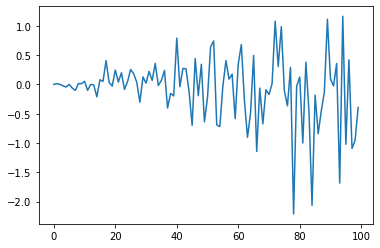

In [17]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# plot
pyplot.plot(data)
pyplot.show()

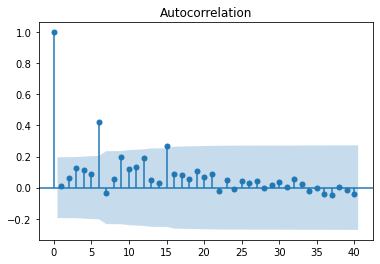

In [18]:
# check correlations of squared observations
from random import gauss
from random import seed
from matplotlib import pyplot
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# square the dataset
squared_data = np.array([x**2 for x in data])
# create acf plot
plot_acf(squared_data,lags=40)
# 에러의 제곱이 어느정도 상관관계를 나타내고 있다.
# 그러므로 ARCH 로 그 관계를 잡아내는게 좋아보인다
pyplot.show()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 88230.5022386919
Iteration:      2,   Func. Count:     36,   Neg. LLF: 145.16343062922158
Iteration:      3,   Func. Count:     54,   Neg. LLF: 128.1580370626462
Iteration:      4,   Func. Count:     72,   Neg. LLF: 109.21755150713977
Iteration:      5,   Func. Count:     90,   Neg. LLF: 36.505742305639636
Iteration:      6,   Func. Count:    108,   Neg. LLF: 39.657385490391924
Iteration:      7,   Func. Count:    126,   Neg. LLF: 28.719725927033075
Iteration:      8,   Func. Count:    143,   Neg. LLF: 28.020270372022498
Iteration:      9,   Func. Count:    161,   Neg. LLF: 34.94721660620315
Iteration:     10,   Func. Count:    180,   Neg. LLF: 30.036228247245106
Iteration:     11,   Func. Count:    198,   Neg. LLF: 26.916795778948643
Iteration:     12,   Func. Count:    216,   Neg. LLF: 35.2329891094671
Iteration:     13,   Func. Count:    235,   Neg. LLF: 25.557781342763224
Iteration:     14,   Func. Count:    253,   Neg. LLF: 25.

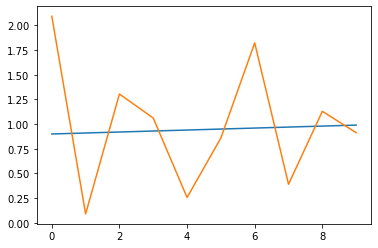

In [19]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

# GARCH

![IMAGE](./Pictures/GARCH.PNG)

- 위와 같이 그 분산이 이전 분산들과도 연관되어있다. 
- ARCH 의 문제점은 ARCH 의 차수를 결정하는 문제와
- 실제로 필요한 차수 Q 의 값이 너무 클 수 있다는 문제 
- 그리고 모델에서의 제약으로 추정 모수가 모두 non negative 여야 하는데 이런 제약조건과 문제를 해결하기 위해 자연스레 나온것이 GARCH 이며 거의 GARCH(1,1) 모형을 쓴다고 한다.

In [23]:
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 134.2317665883839
Iteration:      2,   Func. Count:     70,   Neg. LLF: 95218.99536961706
Iteration:      3,   Func. Count:    103,   Neg. LLF: 544.0666800125144
Iteration:      4,   Func. Count:    136,   Neg. LLF: 359.8214533896114
Iteration:      5,   Func. Count:    169,   Neg. LLF: 120.68464234035743
Iteration:      6,   Func. Count:    202,   Neg. LLF: 57.67987707496318
Iteration:      7,   Func. Count:    235,   Neg. LLF: 37.23386150760782
Iteration:      8,   Func. Count:    268,   Neg. LLF: 44.284822402737774
Iteration:      9,   Func. Count:    301,   Neg. LLF: 30.955486567364034
Iteration:     10,   Func. Count:    334,   Neg. LLF: 26.957562041761186
Iteration:     11,   Func. Count:    366,   Neg. LLF: 31.35843339906071
Iteration:     12,   Func. Count:    400,   Neg. LLF: 30.014600649363558
Iteration:     13,   Func. Count:    433,   Neg. LLF: 28.46149312768924
Iteration:     14,   Func. Count:    466,   Neg. LLF: 27.69

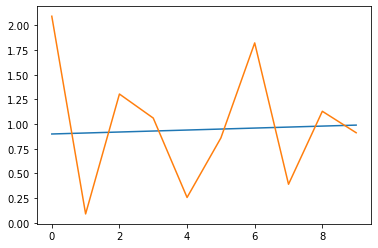

In [24]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

# SES
- Simple Exponential Smoothing

In [22]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.66183441]


# HWES
- Simple Exponential Smoothing

In [21]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.29607266]


# LSTM

# GRU


# Reference

- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
- Forecasting: Principles and Practice - Rob J Hyndman and George Athanasopoulos
- http://econ22.hosting.paran.com/metric2/applied_timeseries_III.pdf
